<h1><center> Supervised Learning </center></h1>

__In supervised machine learning, the model gets trained with labeled data and then we test the model with some unseen data by making predictions__

_Learning from the labelled data and applying the knowledge to predict the label of the new data, is known as Supervised Learning_

__The types of supervised learning are :__

__i) Regression :__ _predicting the continuous outcome_

_example- Linear Regression_

__ii) Classification :__ _process of grouping similar data points_

_example- Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbour, Naive Bayes._

<h1><center> Logistic Regression </center></h1>

__Logistic regression is used to predict the probability of a target variable and the nature of target variable is discrete.__

__For the output there will be only two classes present (categorical)__

_Logistic Regression is also known as_ __Sigmoid Function__

_Sigmoid function = 1/(1+e^-value)_

_Logistic Regression :  p = 1/(1 + e^-(m1x1 + m2x2 + ....+ mnxn + c))_

<h1> <center> Credit Card Fraud Detection </center> </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

C:\Users\sagra\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sagra\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\sagra\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv(r"C:\Users\sagra\Downloads\creditcard.csv")

_Dataset contains 285,000 rows and 31 columns_

_Important columns are: Time, Amount and class (fraud or not fraud)_

class 0 --> not a fraud transaction

class 1 --> fraud transaction

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
data['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [9]:
data['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### Percentage of total not fraud transaction

In [10]:
nfcount= 0
notFraud = data['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount = nfcount+1
nfcount
per_nf = (nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset:', per_nf)

percentage of total not fraud transaction in the dataset: 99.82725143693798


In [11]:
len(notFraud)

284807

In [12]:
nfcount

284315

### Percentage of total fraud transaction

In [13]:
fcount= 0
Fraud = data['Class']
for i in range(len(Fraud)):
    if Fraud[i]==1:
        fcount = fcount+1
fcount
per_f = (fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset:', per_f)

percentage of total fraud transaction in the dataset: 0.1727485630620034


In [14]:
fcount

492

In [15]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction']= Fraud
plot_data['Genuine Transaction']= notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<AxesSubplot:title={'center':' Fraud transaction vs Genuine Transaction'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

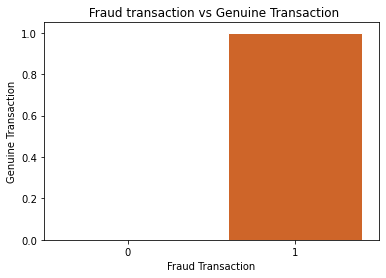

In [16]:
plt.title(" Fraud transaction vs Genuine Transaction") 
sns.barplot(x= 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette= 'Oranges', edgecolor='w')

<AxesSubplot:title={'center':'count plot for Fraud vs Genuine Transactions'}, xlabel='Class', ylabel='count'>

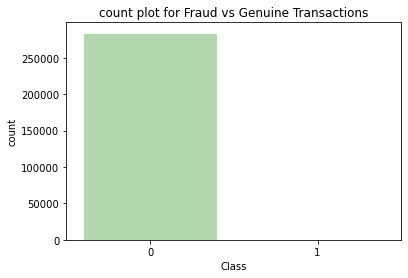

In [17]:
plt.title("count plot for Fraud vs Genuine Transactions")
sns.countplot(x="Class", data= data, palette= 'Greens', edgecolor='w')

_The ratio of Genuine Transactions are higher than Fraud ones_

Text(0.5, 1.0, 'Time vs Amount')

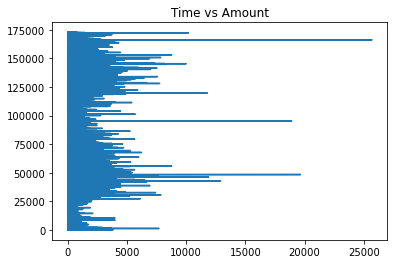

In [18]:
x = data['Amount']
y=data['Time']
plt.plot(x,y)
plt.title("Time vs Amount")


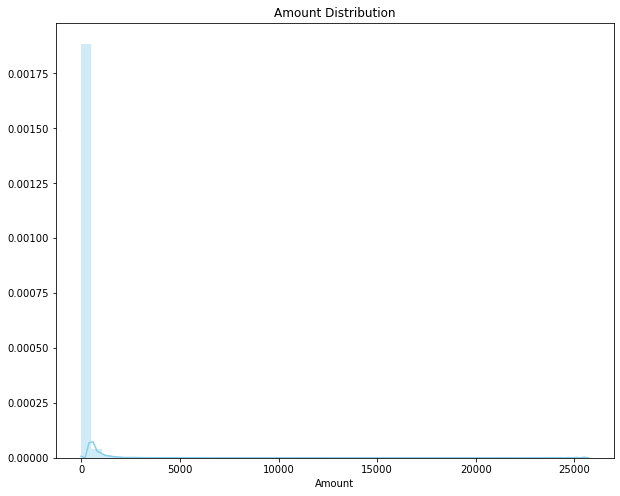

In [19]:
plt.figure(figsize =(10,8))
plt.title('Amount Distribution')
sns.distplot(data['Amount'], color='skyblue');

_From the amount distribution curve, it can be clearly seen that the high amount transactions are very low.So there is a high probability for the transactions to be fraud._

__Outliers__

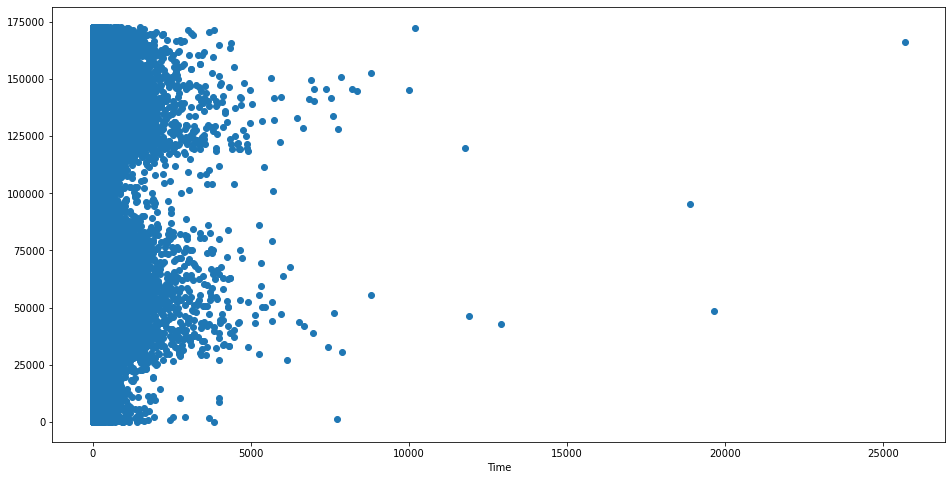

In [20]:
fig, ax= plt.subplots(figsize=(16,8))
ax.scatter(data['Amount'], data['Time'])
ax.set_xlabel('Amount')
ax.set_xlabel('Time')
plt.show()

__Correlation Matrix__

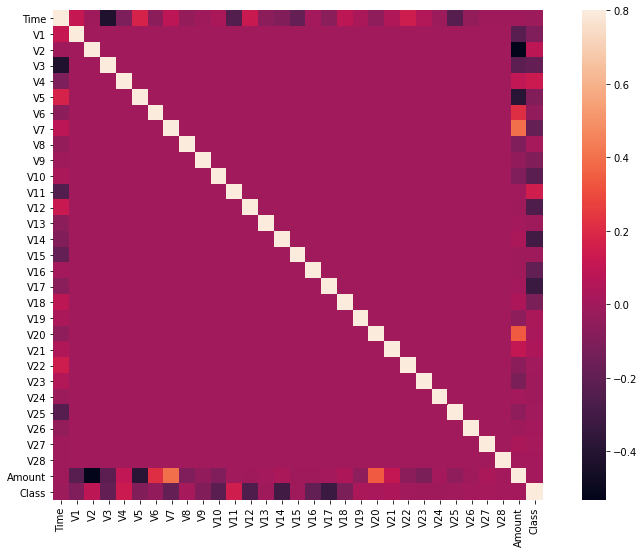

In [21]:
correlation = data.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation, vmax=.8, square = True)
plt.show()

In [22]:
x = data.drop(['Class'], axis=1) # drop the target variable
y = data['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.20, random_state =42)

In [23]:
xtrain.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [24]:
xtrain.shape

(227845, 30)

In [25]:
xtest.shape

(56962, 30)

In [26]:
logisticReg = LogisticRegression()
logisticReg.fit(xtrain, ytrain)

C:\Users\sagra\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
y_pred = logisticReg.predict(xtest)

In [28]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
accuracy = logisticReg.score(xtest, ytest)

In [30]:
accuracy

0.9986306660580738

__Confusion Matrix__

In [31]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56829    35]
 [   43    55]]


__Accuracy__

In [32]:
print("Accuracy score of the Logistic regression Model is :", accuracy*100,'%')

Accuracy score of the Logistic regression Model is : 99.86306660580738 %
